In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import scipy.stats as stats
import numpy as np


/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#maximize cell->able to see all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#import file
data = pd.read_csv('data/0826export.csv')

In [4]:
#convert to lowercase for ease of use
data.columns=data.columns.str.lower()

In [5]:
month=[]
day=[]
year=[]
data['week_end_date'] =  pd.to_datetime(data['week_end_date'])
month = data['week_end_date'].dt.month
day= data['week_end_date'].dt.day
year= data['week_end_date'].dt.year  

data['Day']=pd.Series(day)
data['Month']=pd.Series(month)
data['Year']=pd.Series(year)

In [6]:
data=data.sort_values(by='comp_pct',ascending=False)

In [8]:
#eliminate outliers
data = data.iloc[1:]

In [9]:
data.columns

Index(['div', 'store', 'week_end_date', 'fiscal_year', 'fiscal_week', 'fiscal_month', 'sales_amt_ty', 'sales_amt_ly', 'comp_pct', 'fiscal_year_ly',
       ...
       'avg_ft_tenure_days', 'pt_count', 'pt_tenure_days', 'avg_pt_tenure_days', 'num_of_emps', 'tot_tenure_days', 'tot_avg_tenure_days', 'Day', 'Month', 'Year'], dtype='object', length=107)

In [10]:
data.sort_values(by=['store','fiscal_year','fiscal_week'])

,div,store,week_end_date,fiscal_year,fiscal_week,fiscal_month,sales_amt_ty,sales_amt_ly,comp_pct,fiscal_year_ly,fiscal_week_ly,fiscal_month_ly,week_end_date_ly,mark_down_amt_ty,mark_down_amt_ly,payroll_adj_hours,num_of_days,strak_traffic,strak_hrs,strak_sales_amt,strak_transaction_num,cp_valid_emails,cp_valid_mailing_address,cp_total_trans,cp_emails_per_trans,cp_mail_add_capture_rate,cp_email_mail_capture_rate,cp_total_email_trans,special_order_amt,sales_units,sales_value,shoes_units,shoes_value,multi_units,multi_value,payroll_units,payroll_value,accessory_units,accessory_value,accessory_hosiery_units,accessory_hosiery_value,accessory_shoe_trees_units,accessory_shoe_trees_value,accessory_coats_units,accessory_coats_value,accessory_shirt_sweater_units,accessory_shirt_sweater_value,accessory_plgs_luggage_units,accessory_plgs_luggage_value,accessory_belts_units,accessory_belts_value,accessory_shoe_care_units,accessory_shoe_care_value,accessory_other_units,accessory_other_value,trans_cnt_sales,trans_cnt_returns,trans_cnt_exchg,trans_cnt_exchg_even,trans_cnt_exchg_out,trans_cnt_exchg_in,trans_cnt_empl_sales,trans_cnt_empl_returns,trans_cnt_total,trans_cnt_exchg_cashier,trans_cnt_exchg_original,metric_trans_num,ty_mark_down_pct,ly_mark_down_pct,strak_conversion_pct,strak_sls_per_shopper,strak_avg_trans_size,strak_shopper_to_assoc_ratio,strak_comp_traffic_delta,units_per_trans,dollar_per_trans,shoe_multi_pct,special_order_pct_to_sls,footwear_units_pct,nonfootwear_units_pct,avg_unit_price,avg_footwewar_price,avg_nonfootwewar_price,footwear_amt_pct,nonfootwear_amt_pct,multi_amt_pct,payroll_pct,avg_pay_per_hr,sales_amt_per_pay_hour,mgr_count,mgr_tenure_days,avg_mgr_tenure_days,am_count,am_tenure_days,avg_am_tenure_days,ft_count,ft_tenure_days,avg_ft_tenure_days,pt_count,pt_tenure_days,avg_pt_tenure_days,num_of_emps,tot_tenure_days,tot_avg_tenure_days,Day,Month,Year
0,7,1504,2016-02-06,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,7-Feb-15,1855.11,0.00,192,7,1168,186.88,22003.18,114,51,105,121,0.73910,0.86780,0.80350,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.00,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.00,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.000000,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,6,2,2016
1,7,1504,2016-02-13,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-Feb-15,1986.70,0.00,181,7,891,180.31,17499.86,94,33,74,94,0.51560,0.78720,0.65140,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.80,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.00,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.000000,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,13,2,2016
2,7,1504,2016-02-20,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-Feb-15,1331.95,0.00,183,7,930,182.23,15004.60,79,39,65,78,0.69640,0.83330,0.76490,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.60,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.00,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.000000,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,20,2,2016
3,7,1504,2016-02-27,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-Feb-15,1744.41,0.00,183,7,812,183.17,12770.59,72,34,56,72,0.50750,0.77780,0.64260,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.70,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.50,6,253.00,61,1,5,4,0,1,6,0,73

In [11]:
data.fiscal_year.unique()

array([2019, 2017, 2018, 2020])

In [12]:
stores=data['store'].unique()
stores

array([1508, 1709, 1699, 1597, 1718, 2045, 1824, 2075, 2071, 1819, 1840,
       1646, 2074, 2089, 1832, 1628, 1660, 2061, 1722, 2027, 2034, 1666,
       2082, 2016, 1842, 1838, 1703, 1521, 1804, 1652, 2070, 1614, 1664,
       2050, 1555, 1825, 1848, 1836, 2007, 2017, 1679, 1802, 1837, 1845,
       2038, 1690, 1846, 2035, 2002, 2005, 1670, 1533, 1691, 2066, 2025,
       2020, 2069, 2048, 2042, 2063, 1649, 2060, 2046, 1701, 2084, 2073,
       2018, 2077, 1805, 1637, 1598, 1514, 1844, 1839, 1831, 2014, 1841,
       1559, 1801, 1672, 1683, 2029, 2064, 2052, 2083, 1662, 1578, 1549,
       2004, 1713, 1707, 2033, 1547, 1653, 2085, 2011, 2068, 1600, 1685,
       2009, 2006, 1820, 1843, 1539, 2062, 2024, 2072, 2051, 2067, 1565,
       2041, 1642, 2058, 2055, 2036, 1627, 2044, 1574, 1681, 1814, 1545,
       1817, 1677, 1729, 1818, 2076, 1834, 1715, 1650, 1847, 2079, 2078,
       1808, 1643, 2022, 1673, 2015, 1816, 1697, 2080, 1687, 1815, 2059,
       1711, 2010, 1717, 2001, 2057, 1726, 1693, 20

In [16]:
#create dataframe of delta's for each fiscal years
delta_18_17={}
delta_19_18={}
delta_20_19={}
i=0

#iterate through all unique stores to create dataframe for each fiscal year
for store in stores:
    data_df=data[data['store']==store].sort_values(by=['fiscal_year','fiscal_week'])

    data_2017=data_df[(data_df['fiscal_year']==2017)]
    data_2018=data_df[(data_df['fiscal_year']==2018)]
    data_2019=data_df[(data_df['fiscal_year']==2019)]
    data_2020=data_df[(data_df['fiscal_year']==2020)]

    data_2020=data_2020[['fiscal_week','strak_traffic','strak_conversion_pct','strak_shopper_to_assoc_ratio',
                         'multi_units','comp_pct','avg_pay_per_hr','multi_amt_pct','tot_avg_tenure_days','strak_hrs',
                         'footwear_units_pct','strak_transaction_num','accessory_units','nonfootwear_units_pct','sales_amt_ty']]
    data_2019=data_2019[['fiscal_week','strak_traffic','strak_conversion_pct','strak_shopper_to_assoc_ratio',
                         'multi_units','comp_pct','avg_pay_per_hr','multi_amt_pct','tot_avg_tenure_days','strak_hrs',
                         'footwear_units_pct','strak_transaction_num','accessory_units','nonfootwear_units_pct','sales_amt_ty']]
    data_2018=data_2018[['fiscal_week','strak_traffic','strak_conversion_pct','strak_shopper_to_assoc_ratio',
                         'multi_units','comp_pct','avg_pay_per_hr','multi_amt_pct','tot_avg_tenure_days','strak_hrs',
                         'footwear_units_pct','strak_transaction_num','accessory_units','nonfootwear_units_pct','sales_amt_ty']]
    data_2017=data_2017[['fiscal_week','strak_traffic','strak_conversion_pct','strak_shopper_to_assoc_ratio',
                         'multi_units','comp_pct','avg_pay_per_hr','multi_amt_pct','tot_avg_tenure_days','strak_hrs',
                         'footwear_units_pct','strak_transaction_num','accessory_units','nonfootwear_units_pct','sales_amt_ty']]

#merge each fiscal year with previous fiscal year on identical fiscal week
    delta_data = data_2017.merge(data_2018,on='fiscal_week',how='inner')                  
    delta_data2 = data_2018.merge(data_2019,on='fiscal_week',how='inner')
    delta_data3 = data_2019.merge(data_2020,on='fiscal_week',how='inner')
    
#rename columns for merged dataframe    
    delta_data.rename(columns={'strak_traffic_x':'traffic_2017',
                           'comp_pct_x':'comp_pct_2017',
                           'strak_conversion_pct_x':'conversion_pct_2017',
                           'strak_shopper_to_assoc_ratio_x':'shopper_to_assoc_ratio_2017',
                           'avg_pay_per_hr_x':'avg_pay_per_hr_2017',
                           'multi_amt_pct_x':'multi_amt_pct_2017',
                           'tot_avg_tenure_days_x':'tot_avg_tenure_days_2017',
                           'strak_hrs_x':'strak_hrs_2017',
                           'footwear_units_pct_x':'footwear_units_pct_2017',
                           'accessory_units_x':'accessory_units_2017',
                           'nonfootwear_units_pct_x':'nonfootwear_units_pct_2017',
                           'sales_amt_ty_x':'sales_amt_ty_2017',
                           
                           'strak_transaction_num_x':'strak_transaction_num_2017',
                           'multi_units_x':'multi_units_2017',
                               
                           'strak_traffic_y':'traffic_2018',
                           'strak_conversion_pct_y':'conversion_pct_2018',
                           'comp_pct_y':'comp_pct_2018',
                           'strak_shopper_to_assoc_ratio_y':'shopper_to_assoc_ratio_2018',
                           'avg_pay_per_hr_y':'avg_pay_per_hr_2018',
                           'multi_amt_pct_y':'multi_amt_pct_2018',
                           'tot_avg_tenure_days_y':'tot_avg_tenure_days_2018',
                           'strak_hrs_y':'strak_hrs_2018',
                           'footwear_units_pct_y':'footwear_units_pct_2018',
                           'accessory_units_y':'accessory_units_2018',
                           'nonfootwear_units_pct_y':'nonfootwear_units_pct_2018',
                           'sales_amt_ty_y':'sales_amt_ty_2018',
                           
                           'strak_transaction_num_y':'strak_transaction_num_2018',
                           'multi_units_y':'multi_units_2018'
                            },inplace=True)

    delta_data2.rename(columns={'strak_traffic_x':'traffic_2018',
                           'comp_pct_x':'comp_pct_2018',
                           'strak_conversion_pct_x':'conversion_pct_2018',
                           'strak_shopper_to_assoc_ratio_x':'shopper_to_assoc_ratio_2018',
                           'avg_pay_per_hr_x':'avg_pay_per_hr_2018',
                           'multi_amt_pct_x':'multi_amt_pct_2018',
                           'tot_avg_tenure_days_x':'tot_avg_tenure_days_2018',
                           'strak_hrs_x':'strak_hrs_2018',
                           'footwear_units_pct_x':'footwear_units_pct_2018',
                           'accessory_units_x':'accessory_units_2018', 
                           'nonfootwear_units_pct_x':'nonfootwear_units_pct_2018',
                           'sales_amt_ty_x':'sales_amt_ty_2018',   
                           
                           'strak_transaction_num_x':'strak_transaction_num_2018',
                           'multi_units_x':'multi_units_2018',
                           
                           'strak_traffic_y':'traffic_2019',
                           'strak_conversion_pct_y':'conversion_pct_2019',
                           'comp_pct_y':'comp_pct_2019',
                           'strak_shopper_to_assoc_ratio_y':'shopper_to_assoc_ratio_2019',
                           'avg_pay_per_hr_y':'avg_pay_per_hr_2019',
                           'multi_amt_pct_y':'multi_amt_pct_2019',
                           'tot_avg_tenure_days_y':'tot_avg_tenure_days_2019',
                           'strak_hrs_y':'strak_hrs_2019',
                           'footwear_units_pct_y':'footwear_units_pct_2019',
                           'accessory_units_y':'accessory_units_2019',
                           'nonfootwear_units_pct_y':'nonfootwear_units_pct_2019',
                           'sales_amt_ty_y':'sales_amt_ty_2019',
                          
                           'strak_transaction_num_y':'strak_transaction_num_2019',
                           'multi_units_y':'multi_units_2019',
    
                            },inplace=True)

    delta_data3.rename(columns={'strak_traffic_x':'traffic_2019',
                           'comp_pct_x':'comp_pct_2019',
                           'strak_conversion_pct_x':'conversion_pct_2019',
                           'strak_shopper_to_assoc_ratio_x':'shopper_to_assoc_ratio_2019',
                           'avg_pay_per_hr_x':'avg_pay_per_hr_2019',
                           'multi_amt_pct_x':'multi_amt_pct_2019',
                           'tot_avg_tenure_days_x':'tot_avg_tenure_days_2019',
                           'strak_hrs_x':'strak_hrs_2019',
                           'footwear_units_pct_x':'footwear_units_pct_2019',
                           'accessory_units_x':'accessory_units_2019', 
                           'nonfootwear_units_pct_x':'nonfootwear_units_pct_2019',
                           'sales_amt_ty_x':'sales_amt_ty_2019',
                           
                           'strak_transaction_num_x':'strak_transaction_num_2019',
                           'multi_units_x':'multi_units_2019',
                           
                           'strak_traffic_y':'traffic_2020',
                           'strak_conversion_pct_y':'conversion_pct_2020',
                           'comp_pct_y':'comp_pct_2020',
                           'strak_shopper_to_assoc_ratio_y':'shopper_to_assoc_ratio_2020',
                           'avg_pay_per_hr_y':'avg_pay_per_hr_2020',
                           'multi_amt_pct_y':'multi_amt_pct_2020',
                           'tot_avg_tenure_days_y':'tot_avg_tenure_days_2020',
                           'strak_hrs_y':'strak_hrs_2020',
                           'footwear_units_pct_y':'footwear_units_pct_2020',
                           'accessory_units_y':'accessory_units_2020',
                           'nonfootwear_units_pct_y':'nonfootwear_units_pct_2020',
                           'sales_amt_ty_y':'sales_amt_ty_2020',
                           
                           'strak_transaction_num_y':'strak_transaction_num_2020',
                           'multi_units_y':'multi_units_2020',
    
                            },inplace=True)
    
#new column with calculated delta's
    delta_data['delta_traffic_18-17']=(delta_data['traffic_2018']-delta_data['traffic_2017'])
    delta_data['delta_conversion_pct_18-17']=(delta_data['conversion_pct_2018']-delta_data['conversion_pct_2017'])
    delta_data['delta_star_18-17']=(delta_data['shopper_to_assoc_ratio_2018']-delta_data['shopper_to_assoc_ratio_2017'])
    delta_data['delta_avg_hr_pay_18-17']=(delta_data['avg_pay_per_hr_2018']-delta_data['avg_pay_per_hr_2017'])
    delta_data['delta_multi_amt_pct_18-17']=(delta_data['multi_amt_pct_2018']-delta_data['multi_amt_pct_2017'])
    delta_data['delta_nonfootwear_units_pct_18-17']=(delta_data['nonfootwear_units_pct_2018']-delta_data['nonfootwear_units_pct_2017'])

    delta_data['delta_tot_avg_tenure_days_18-17']=(delta_data['tot_avg_tenure_days_2018']-delta_data['tot_avg_tenure_days_2017'])
    delta_data['delta_strak_hrs_18-17']=(delta_data['strak_hrs_2018']-delta_data['strak_hrs_2017'])
    delta_data['delta_footwear_units_pct_18-17']=(delta_data['footwear_units_pct_2018']-delta_data['footwear_units_pct_2017'])
    delta_data['delta_accessory_units_18-17']=(delta_data['accessory_units_2018']-delta_data['accessory_units_2017'])
    delta_data['delta_accessory_units_pct_18-17']=((delta_data['accessory_units_2018']/delta_data['sales_amt_ty_2018'])-(delta_data['accessory_units_2017']/delta_data['sales_amt_ty_2017']))
    delta_data['delta_strak_transaction_num_18-17']=(delta_data['strak_transaction_num_2018']-delta_data['strak_transaction_num_2017'])
    delta_data['delta_multi_units_18-17']=(delta_data['multi_units_2018']-delta_data['multi_units_2017'])
                                         
    delta_18_17[i]=pd.DataFrame(data=delta_data)

    delta_data2['delta_traffic_19-18']=(delta_data2['traffic_2019']-delta_data2['traffic_2018'])
    delta_data2['delta_conversion_pct_19-18']=(delta_data2['conversion_pct_2019']-delta_data2['conversion_pct_2018'])
    delta_data2['delta_star_19-18']=(delta_data2['shopper_to_assoc_ratio_2019']-delta_data2['shopper_to_assoc_ratio_2018'])
    delta_data2['delta_avg_hr_pay_19-18']=(delta_data2['avg_pay_per_hr_2019']-delta_data2['avg_pay_per_hr_2018'])
    delta_data2['delta_multi_amt_pct_19-18']=(delta_data2['multi_amt_pct_2019']-delta_data2['multi_amt_pct_2018'])
    
    delta_data2['delta_tot_avg_tenure_days_19-18']=(delta_data2['tot_avg_tenure_days_2019']-delta_data2['tot_avg_tenure_days_2018'])
    delta_data2['delta_strak_hrs_19-18']=(delta_data2['strak_hrs_2019']-delta_data2['strak_hrs_2018'])
    delta_data2['delta_footwear_units_pct_19-18']=(delta_data2['footwear_units_pct_2019']-delta_data2['footwear_units_pct_2018'])
    delta_data2['delta_accessory_units_19-18']=(delta_data2['accessory_units_2019']-delta_data2['accessory_units_2018'])
    delta_data2['delta_accessory_units_pct_19-18']=((delta_data2['accessory_units_2019']/delta_data2['sales_amt_ty_2019'])-(delta_data2['accessory_units_2018']/delta_data2['sales_amt_ty_2018']))                                             
    delta_data2['delta_nonfootwear_units_pct_19-18']=(delta_data2['nonfootwear_units_pct_2019']-delta_data2['nonfootwear_units_pct_2018'])
 
    delta_data2['delta_strak_transaction_num_19-18']=(delta_data2['strak_transaction_num_2019']-delta_data2['strak_transaction_num_2018'])
    delta_data2['delta_multi_units_19-18']=(delta_data2['multi_units_2019']-delta_data2['multi_units_2018'])

    
    delta_19_18[i]=pd.DataFrame(data=delta_data2)
    
    delta_data3['delta_traffic_20-19']=(delta_data3['traffic_2020']-delta_data3['traffic_2019'])
    delta_data3['delta_conversion_pct_20-19']=(delta_data3['conversion_pct_2020']-delta_data3['conversion_pct_2019'])
    delta_data3['delta_star_20-19']=(delta_data3['shopper_to_assoc_ratio_2020']-delta_data3['shopper_to_assoc_ratio_2019'])
    delta_data3['delta_avg_hr_pay_20-19']=(delta_data3['avg_pay_per_hr_2020']-delta_data3['avg_pay_per_hr_2019'])
    delta_data3['delta_multi_amt_pct_20-19']=(delta_data3['multi_amt_pct_2020']-delta_data3['multi_amt_pct_2019'])
    
    delta_data3['delta_tot_avg_tenure_days_20-19']=(delta_data3['tot_avg_tenure_days_2020']-delta_data3['tot_avg_tenure_days_2019'])
    delta_data3['delta_strak_hrs_20-19']=(delta_data3['strak_hrs_2020']-delta_data3['strak_hrs_2019'])
    delta_data3['delta_footwear_units_pct_20-19']=(delta_data3['footwear_units_pct_2020']-delta_data3['footwear_units_pct_2019'])
    delta_data3['delta_accessory_units_20-19']=(delta_data3['accessory_units_2020']-delta_data3['accessory_units_2019'])
    delta_data3['delta_accessory_units_pct_20-19']=((delta_data3['accessory_units_2020']/delta_data3['sales_amt_ty_2020'])-(delta_data3['accessory_units_2019']/delta_data3['sales_amt_ty_2019']))                                               
    delta_data3['delta_nonfootwear_units_pct_20-19']=(delta_data3['nonfootwear_units_pct_2020']-delta_data3['nonfootwear_units_pct_2019'])
    
    delta_data3['delta_strak_transaction_num_20-19']=(delta_data3['strak_transaction_num_2020']-delta_data3['strak_transaction_num_2019'])
    delta_data3['delta_multi_units_20-19']=(delta_data3['multi_units_2020']-delta_data3['multi_units_2019'])

    delta_20_19[i]=pd.DataFrame(data=delta_data3)
    
#concatenate all tables    
    i=i+1
    counter=i
i=0
while i < counter-1:
    delta_18_17[i+1]=pd.concat([delta_18_17[i],delta_18_17[i+1]],ignore_index=True)
    delta_19_18[i+1]=pd.concat([delta_19_18[i],delta_19_18[i+1]],ignore_index=True)
    delta_20_19[i+1]=pd.concat([delta_20_19[i],delta_20_19[i+1]],ignore_index=True)

    i=i+1


/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:190: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:191: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:192: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain 

In [17]:
delta_18_17=delta_18_17[173]
delta_19_18=delta_19_18[173]
delta_20_19=delta_20_19[173]

In [18]:
print(delta_18_17.shape,delta_19_18.shape,delta_20_19.shape)

(6681, 42) (6973, 42) (3816, 42)


In [36]:
#export new dataframe to csv file
delta_18_17.to_csv('data/delta_18_17.csv')

In [37]:
delta_19_18.to_csv('data/delta_19_18.csv')

In [38]:
delta_20_19.to_csv('data/delta_20_19.csv')

In [28]:
df1=delta_18_17[['comp_pct_2018','delta_traffic_18-17','delta_conversion_pct_18-17','delta_star_18-17','delta_strak_hrs_18-17',
                 'delta_avg_hr_pay_18-17','delta_multi_amt_pct_18-17','delta_footwear_units_pct_18-17','delta_multi_units_18-17',
                 'delta_tot_avg_tenure_days_18-17','delta_accessory_units_pct_18-17','delta_nonfootwear_units_pct_18-17']]

df2=delta_19_18[['comp_pct_2019','delta_traffic_19-18','delta_conversion_pct_19-18','delta_star_19-18','delta_strak_hrs_19-18',
                 'delta_avg_hr_pay_19-18','delta_multi_amt_pct_19-18','delta_footwear_units_pct_19-18','delta_multi_units_19-18',
                 'delta_tot_avg_tenure_days_19-18','delta_accessory_units_pct_19-18','delta_nonfootwear_units_pct_19-18']]

df3=delta_20_19[['comp_pct_2020','delta_traffic_20-19','delta_conversion_pct_20-19','delta_star_20-19','delta_strak_hrs_20-19',
                 'delta_avg_hr_pay_20-19','delta_multi_amt_pct_20-19','delta_footwear_units_pct_20-19','delta_multi_units_20-19',
                 'delta_tot_avg_tenure_days_20-19','delta_accessory_units_pct_20-19','delta_nonfootwear_units_pct_20-19']]

In [29]:
pearsoncorr=df1.corr(method='pearson')
pearsoncorr2=df2.corr(method='pearson')
pearsoncorr3=df3.corr(method='pearson')

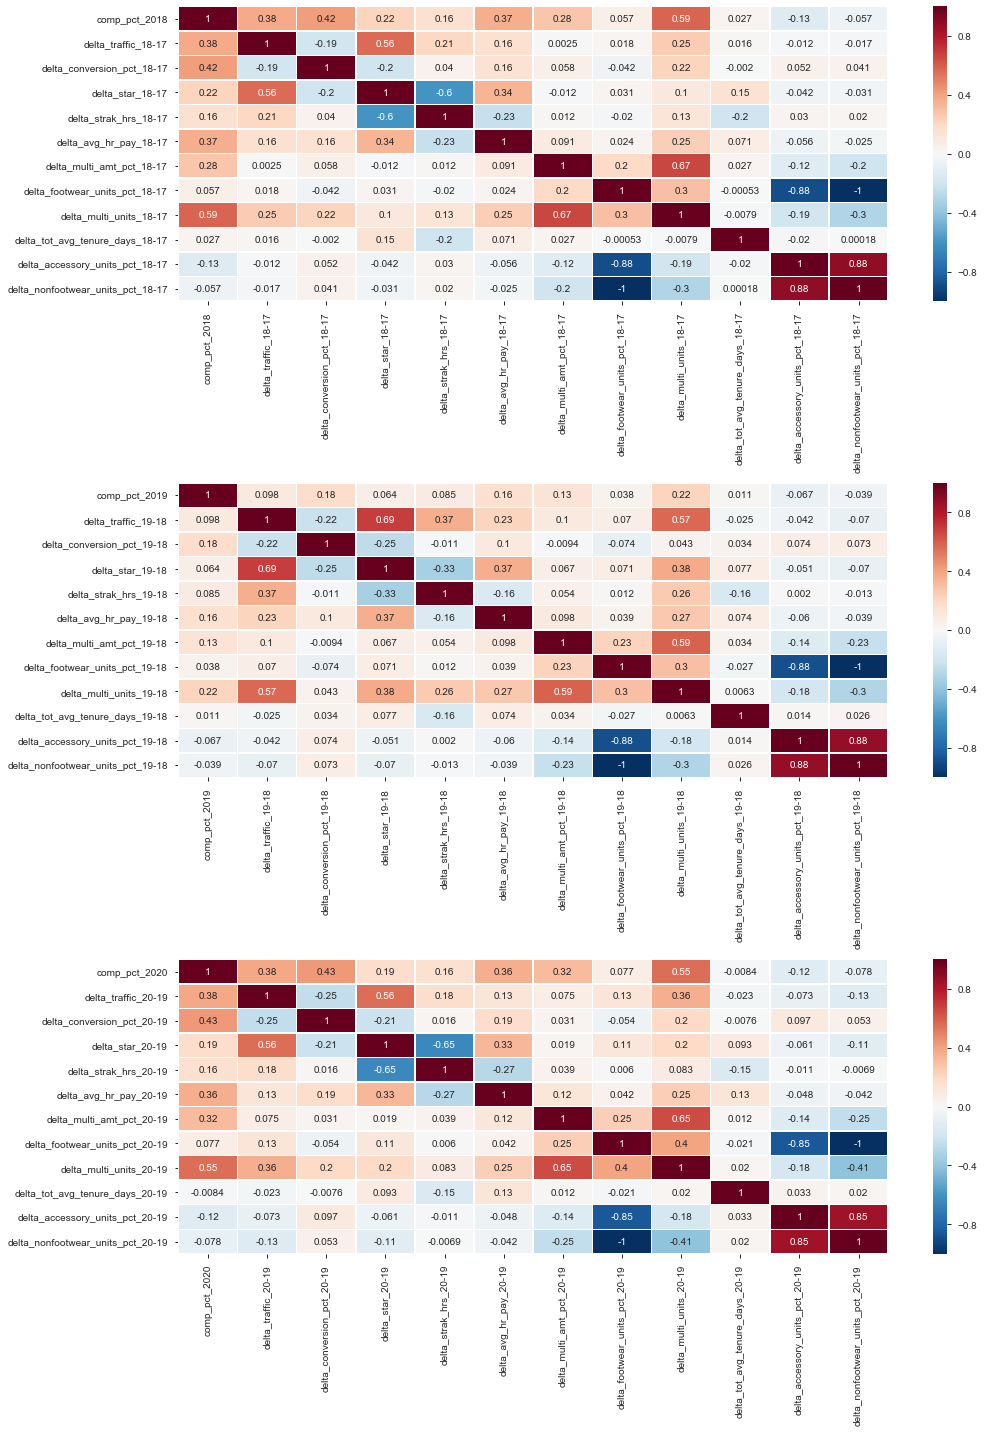

In [30]:
plt.subplots(figsize=(15,20))

plt.subplot(3,1,1)
ax= sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(3,1,2)
ax= sns.heatmap(pearsoncorr2, 
            xticklabels=pearsoncorr2.columns,
            yticklabels=pearsoncorr2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(313)
ax= sns.heatmap(pearsoncorr3, 
            xticklabels=pearsoncorr3.columns,
            yticklabels=pearsoncorr3.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



plt.tight_layout();



In [35]:
delta_18_17=delta_18_17.sort_values(by='comp_pct_2018',ascending=False)
delta_19_18=delta_19_18.sort_values(by='comp_pct_2019',ascending=False)
delta_20_19=delta_20_19.sort_values(by='comp_pct_2020',ascending=False)

In [32]:
delta_18_17.head(3)

,accessory_units_2017,accessory_units_2018,avg_pay_per_hr_2017,avg_pay_per_hr_2018,comp_pct_2017,comp_pct_2018,conversion_pct_2017,conversion_pct_2018,delta_accessory_units_18-17,delta_accessory_units_pct_18-17,delta_avg_hr_pay_18-17,delta_conversion_pct_18-17,delta_footwear_units_pct_18-17,delta_multi_amt_pct_18-17,delta_multi_units_18-17,delta_nonfootwear_units_pct_18-17,delta_star_18-17,delta_strak_hrs_18-17,delta_strak_transaction_num_18-17,delta_tot_avg_tenure_days_18-17,delta_traffic_18-17,fiscal_week,footwear_units_pct_2017,footwear_units_pct_2018,multi_amt_pct_2017,multi_amt_pct_2018,multi_units_2017,multi_units_2018,nonfootwear_units_pct_2017,nonfootwear_units_pct_2018,sales_amt_ty_2017,sales_amt_ty_2018,shopper_to_assoc_ratio_2017,shopper_to_assoc_ratio_2018,strak_hrs_2017,strak_hrs_2018,strak_transaction_num_2017,strak_transaction_num_2018,tot_avg_tenure_days_2017,tot_avg_tenure_days_2018,traffic_2017,traffic_2018
487,46,87,21.551605,15.036658,-0.778297,2.875502,0.152941,0.158019,41,-0.008065,-6.514947,0.005078,0.158067,0.240362,17,-0.158067,1.431988,38.76,41,350,254,36,0.206897,0.364964,0.153405,0.393767,2,19,0.793103,0.635036,2920.21,11317.28,3.085860,4.517848,55.09,93.85,26,67,405,755,170,424
714,49,198,13.156558,15.082796,-0.700524,2.491919,0.126016,0.151603,149,0.001916,1.926238,0.025587,-0.025118,0.159759,33,0.021572,2.601837,37.29,73,-520,440,37,0.319444,0.294326,0.271622,0.431381,6,39,0.680556,0.702128,4019.95,14037.34,2.602624,5.204461,94.52,131.81,31,104,1573,1053,246,686
1199,60,148,14.004496,23.492682,0.108810,1.867678,0.314685,0.267857,88,-0.001609,9.488186,-0.046828,0.088460,0.182783,56,-0.092291,2.438302,-5.24,45,277,193,4,0.340659,0.429119,0.429908,0.612691,14,70,0.659341,0.567050,5214.92,14954.71,1.627034,4.065336,87.89,82.65,45,90,141,418,143,336


In [33]:
#divide delta dataframe in to two groups pos comp pct and negative pos comp pct
pos_1817=delta_18_17[delta_18_17['comp_pct_2018']>=0]
neg_1817=delta_18_17[delta_18_17['comp_pct_2018']<0]

pos_1918=delta_19_18[delta_19_18['comp_pct_2019']>=0]
neg_1918=delta_19_18[delta_19_18['comp_pct_2019']<0]

pos_2019=delta_20_19[delta_20_19['comp_pct_2020']>=0]
neg_2019=delta_20_19[delta_20_19['comp_pct_2020']<0]

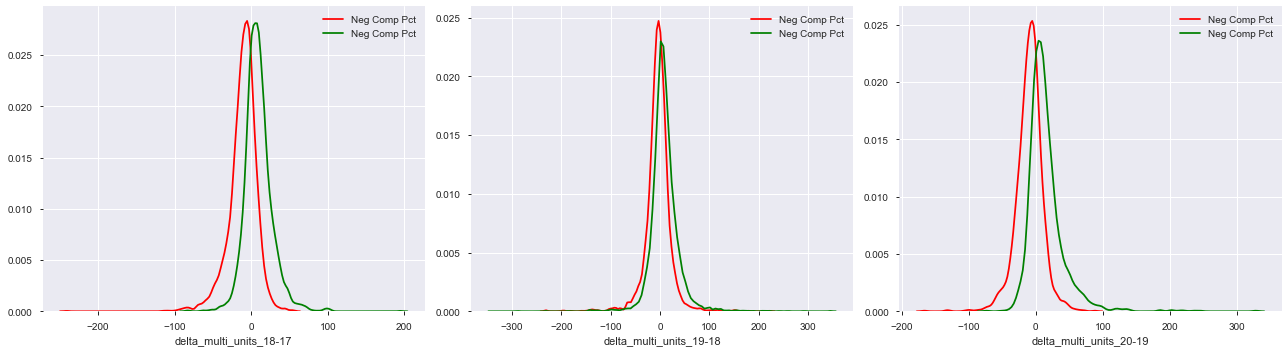

In [34]:
#plot different metrics of the two groups
plt.subplots(figsize=(18,5))
plt.subplot(131)
sns.distplot(neg_1817['delta_multi_units_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_multi_units_18-17'],color='g',hist=False,label='Neg Comp Pct')

plt.subplot(132)
sns.distplot(neg_1918['delta_multi_units_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_multi_units_19-18'],color='g',hist=False,label='Neg Comp Pct')

plt.subplot(133)
sns.distplot(neg_2019['delta_multi_units_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_multi_units_20-19'],color='g',hist=False,label='Neg Comp Pct')

plt.tight_layout();

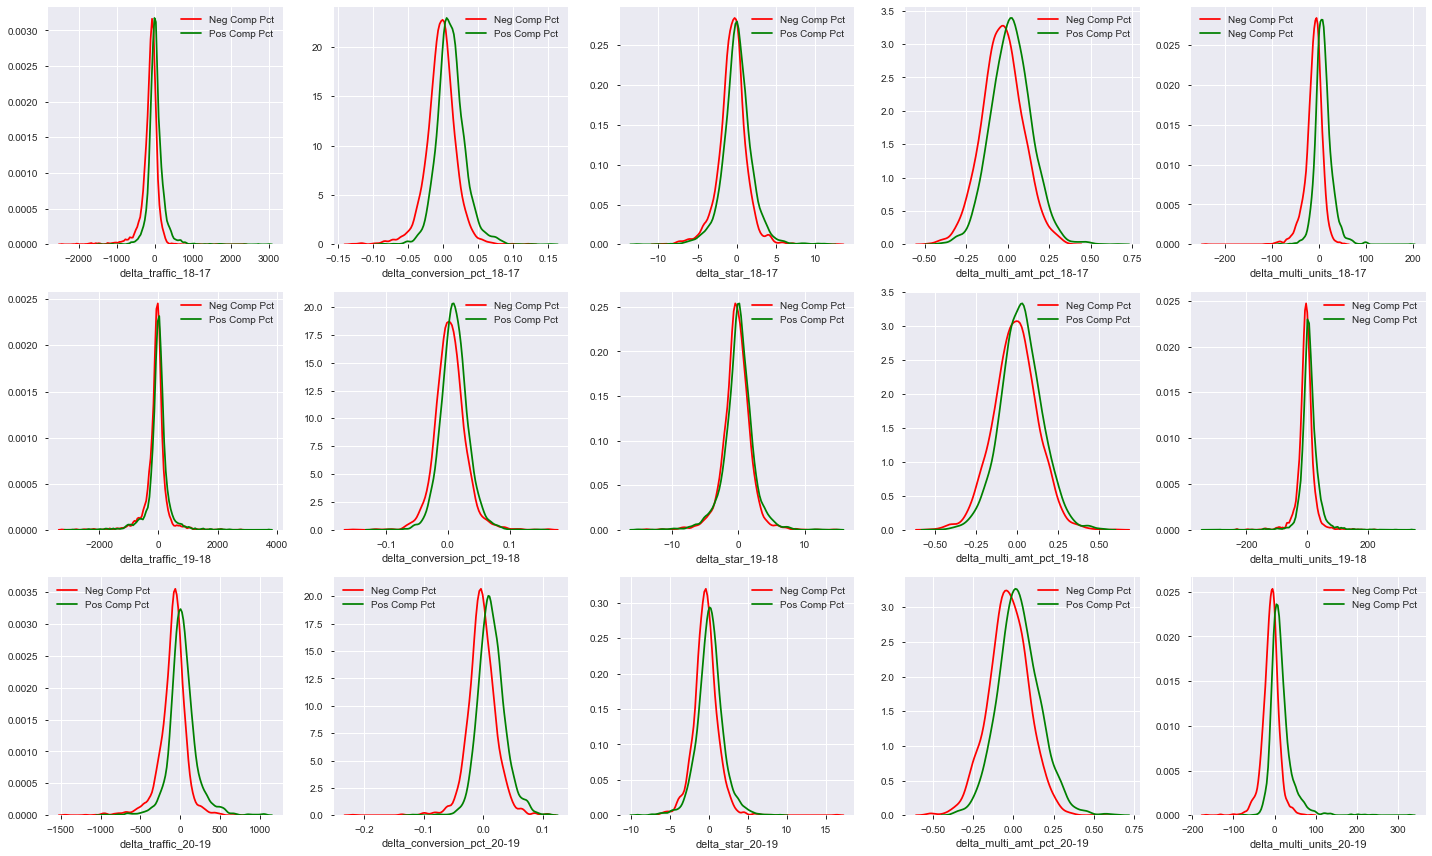

In [39]:
plt.subplots(figsize=(20,12))


plt.subplot(3,5,1)
sns.distplot(neg_1817['delta_traffic_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_traffic_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,2)
sns.distplot(neg_1817['delta_conversion_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_conversion_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,3)
sns.distplot(neg_1817['delta_star_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_star_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,4)
sns.distplot(neg_1817['delta_multi_amt_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_multi_amt_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,5)
sns.distplot(neg_1817['delta_multi_units_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_multi_units_18-17'],color='g',hist=False,label='Neg Comp Pct')



plt.subplot(3,5,6)
sns.distplot(neg_1918['delta_traffic_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_traffic_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,7)
sns.distplot(neg_1918['delta_conversion_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_conversion_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,8)
sns.distplot(neg_1918['delta_star_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_star_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,9)
sns.distplot(neg_1918['delta_multi_amt_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_multi_amt_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,10)
sns.distplot(neg_1918['delta_multi_units_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_multi_units_19-18'],color='g',hist=False,label='Neg Comp Pct')


plt.subplot(3,5,11)
sns.distplot(neg_2019['delta_traffic_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_traffic_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,12)
sns.distplot(neg_2019['delta_conversion_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_conversion_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,13)
sns.distplot(neg_2019['delta_star_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_star_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,14)
sns.distplot(neg_2019['delta_multi_amt_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_multi_amt_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,15)
sns.distplot(neg_2019['delta_multi_units_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_multi_units_20-19'],color='g',hist=False,label='Neg Comp Pct')



plt.tight_layout();

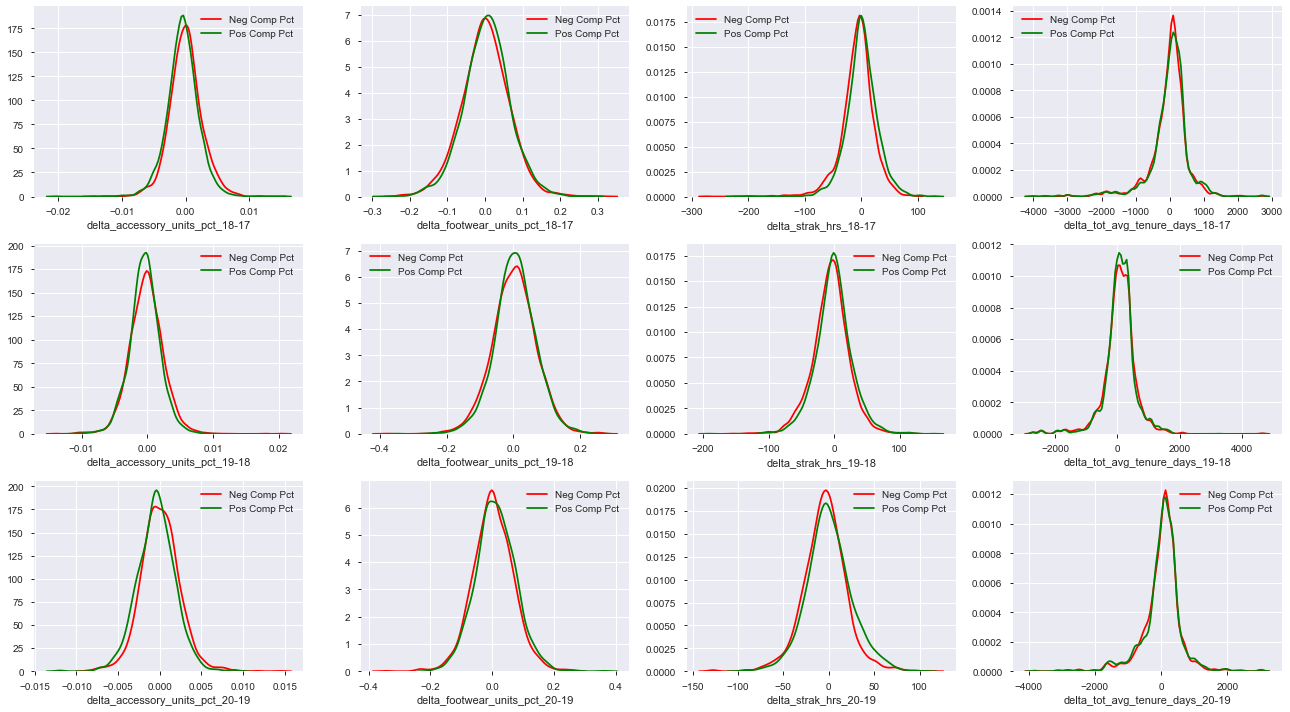

In [561]:
plt.subplots(figsize=(18,10))


plt.subplot(3,4,1)
sns.distplot(neg_1817['delta_accessory_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_accessory_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,2)
sns.distplot(neg_1817['delta_footwear_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_footwear_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,3)
sns.distplot(neg_1817['delta_strak_hrs_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_strak_hrs_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,4)
sns.distplot(neg_1817['delta_tot_avg_tenure_days_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_tot_avg_tenure_days_18-17'],color='g',hist=False,label='Pos Comp Pct')
;

plt.subplot(3,4,5)
sns.distplot(neg_1918['delta_accessory_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_accessory_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,6)
sns.distplot(neg_1918['delta_footwear_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_footwear_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,7)
sns.distplot(neg_1918['delta_strak_hrs_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_strak_hrs_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,8)
sns.distplot(neg_1918['delta_tot_avg_tenure_days_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_tot_avg_tenure_days_19-18'],color='g',hist=False,label='Pos Comp Pct');

plt.subplot(3,4,9)
sns.distplot(neg_2019['delta_accessory_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_accessory_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,10)
sns.distplot(neg_2019['delta_footwear_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_footwear_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,11)
sns.distplot(neg_2019['delta_strak_hrs_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_strak_hrs_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,12)
sns.distplot(neg_2019['delta_tot_avg_tenure_days_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_tot_avg_tenure_days_20-19'],color='g',hist=False,label='Pos Comp Pct')
;

plt.tight_layout();

In [625]:
pos_1817_300=pos_1817.iloc[:1575]
neg_1817_300=neg_1817.iloc[-1765:]

pos_1918_300=pos_1918.iloc[:2072]
neg_1918_300=neg_1918.iloc[-1410:]

pos_2019_300=pos_2019.iloc[:916]
neg_2019_300=neg_2019.iloc[-993:]




In [620]:
print(pos_1817.shape,neg_1817.shape,pos_1918.shape,neg_1918.shape,pos_2019.shape,neg_2019.shape)

(3150, 39) (3531, 39) (4144, 39) (2829, 39) (1831, 39) (1985, 39)


In [624]:
print(3150/2,3531/2,4144/2,2819/2,1831/2,1985/2)

1575.0 1765.5 2072.0 1409.5 915.5 992.5


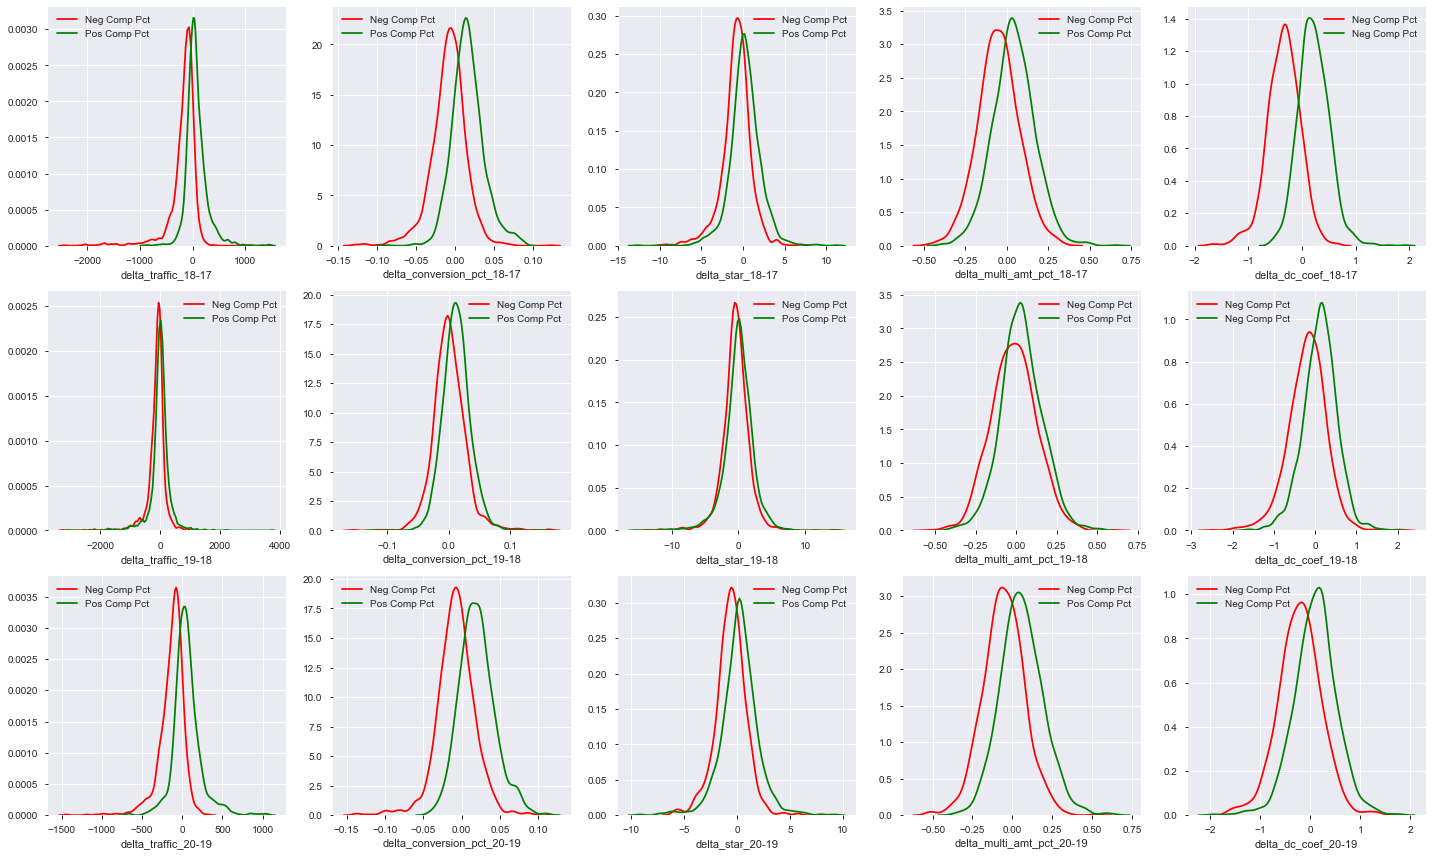

In [626]:
plt.subplots(figsize=(20,12))


plt.subplot(3,5,1)
sns.distplot(neg_1817_300['delta_traffic_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_traffic_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,2)
sns.distplot(neg_1817_300['delta_conversion_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_conversion_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,3)
sns.distplot(neg_1817_300['delta_star_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_star_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,4)
sns.distplot(neg_1817_300['delta_multi_amt_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_multi_amt_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,5)
sns.distplot(neg_1817_300['delta_dc_coef_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_dc_coef_18-17'],color='g',hist=False,label='Neg Comp Pct')



plt.subplot(3,5,6)
sns.distplot(neg_1918_300['delta_traffic_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_traffic_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,7)
sns.distplot(neg_1918_300['delta_conversion_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_conversion_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,8)
sns.distplot(neg_1918_300['delta_star_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_star_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,9)
sns.distplot(neg_1918_300['delta_multi_amt_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_multi_amt_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,10)
sns.distplot(neg_1918_300['delta_dc_coef_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_dc_coef_19-18'],color='g',hist=False,label='Neg Comp Pct')


plt.subplot(3,5,11)
sns.distplot(neg_2019_300['delta_traffic_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_traffic_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,12)
sns.distplot(neg_2019_300['delta_conversion_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_conversion_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,13)
sns.distplot(neg_2019_300['delta_star_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_star_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,14)
sns.distplot(neg_2019_300['delta_multi_amt_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_multi_amt_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,5,15)
sns.distplot(neg_2019_300['delta_dc_coef_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_dc_coef_20-19'],color='g',hist=False,label='Neg Comp Pct')



plt.tight_layout();

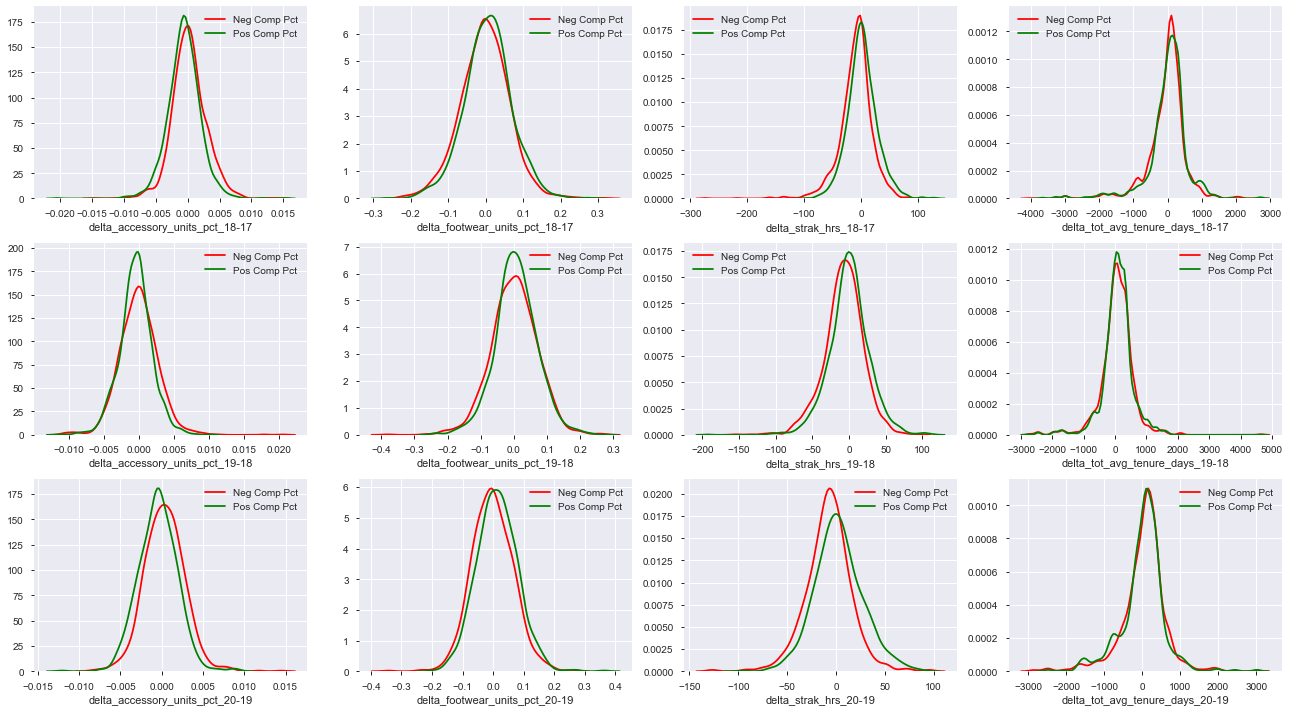

In [564]:
plt.subplots(figsize=(18,10))


plt.subplot(3,4,1)
sns.distplot(neg_1817_300['delta_accessory_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_accessory_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,2)
sns.distplot(neg_1817_300['delta_footwear_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_footwear_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,3)
sns.distplot(neg_1817_300['delta_strak_hrs_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_strak_hrs_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,4)
sns.distplot(neg_1817_300['delta_tot_avg_tenure_days_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_tot_avg_tenure_days_18-17'],color='g',hist=False,label='Pos Comp Pct')


plt.subplot(3,4,5)
sns.distplot(neg_1918_300['delta_accessory_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_accessory_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,6)
sns.distplot(neg_1918_300['delta_footwear_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_footwear_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,7)
sns.distplot(neg_1918_300['delta_strak_hrs_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_strak_hrs_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,8)
sns.distplot(neg_1918_300['delta_tot_avg_tenure_days_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_tot_avg_tenure_days_19-18'],color='g',hist=False,label='Pos Comp Pct')
;

plt.subplot(3,4,9)
sns.distplot(neg_2019_300['delta_accessory_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_accessory_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,10)
sns.distplot(neg_2019_300['delta_footwear_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_footwear_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,11)
sns.distplot(neg_2019_300['delta_strak_hrs_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_strak_hrs_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(3,4,12)
sns.distplot(neg_2019_300['delta_tot_avg_tenure_days_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_tot_avg_tenure_days_20-19'],color='g',hist=False,label='Pos Comp Pct')
;

plt.tight_layout();

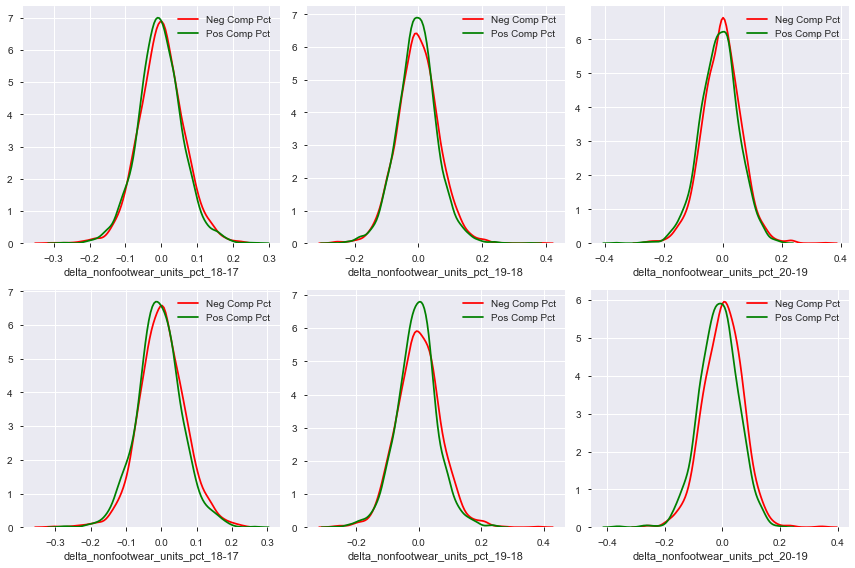

In [546]:
plt.subplots(figsize=(12,8))

plt.subplot(2,3,1)
sns.distplot(neg_1817['delta_nonfootwear_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817['delta_nonfootwear_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(2,3,2)
sns.distplot(neg_1918['delta_nonfootwear_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918['delta_nonfootwear_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(2,3,3)
sns.distplot(neg_2019['delta_nonfootwear_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019['delta_nonfootwear_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')


plt.subplot(2,3,4)
sns.distplot(neg_1817_300['delta_nonfootwear_units_pct_18-17'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1817_300['delta_nonfootwear_units_pct_18-17'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(2,3,5)
sns.distplot(neg_1918_300['delta_nonfootwear_units_pct_19-18'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_1918_300['delta_nonfootwear_units_pct_19-18'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(2,3,6)
sns.distplot(neg_2019_300['delta_nonfootwear_units_pct_20-19'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_2019_300['delta_nonfootwear_units_pct_20-19'],color='g',hist=False,label='Pos Comp Pct')
plt.tight_layout();


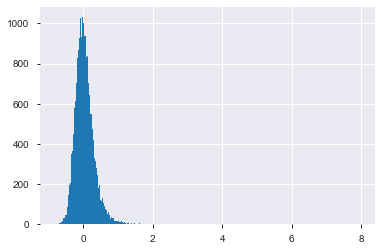

In [642]:
plt.hist(data.comp_pct,bins='auto');

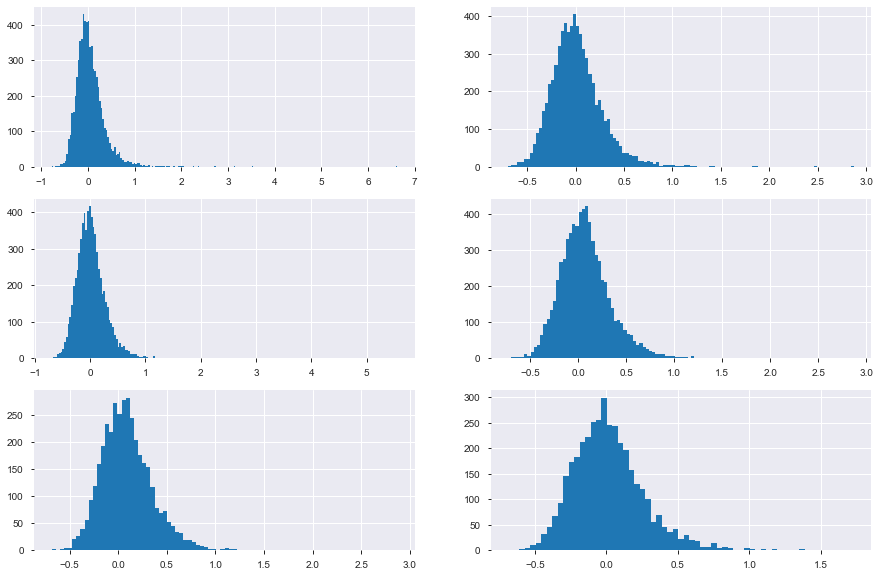

In [640]:
plt.subplots(figsize=(15,10))
plt.subplot(3,2,1)
plt.hist(delta_18_17.comp_pct_2017,bins='auto')
plt.subplot(3,2,2)
plt.hist(delta_18_17.comp_pct_2018,bins='auto')
plt.subplot(3,2,3)
plt.hist(delta_19_18.comp_pct_2018,bins='auto')
plt.subplot(3,2,4)
plt.hist(delta_19_18.comp_pct_2019,bins='auto')
plt.subplot(3,2,5)
plt.hist(delta_20_19.comp_pct_2019,bins='auto')
plt.subplot(3,2,6)
plt.hist(delta_20_19.comp_pct_2020,bins='auto');